In [1]:
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pylab as plt

In [2]:
TFHub_Model ="https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 64

In [3]:
data_dir = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

228827136/228813984 [==============================] - 2s 0us/step


In [4]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(data_dir, subset="training", shuffle=True, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE)

valid_generator = valid_datagen.flow_from_directory(data_dir, subset="validation", shuffle=False, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE)

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [5]:
model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
  hub.KerasLayer(TFHub_Model, trainable=True),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(train_generator.num_classes)
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 2,230,277
Non-trainable params: 34,112
_________________________________________________________________


In [6]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(lr=0.005, momentum=0.9),
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [7]:
hist = model.fit(
    train_generator,
    epochs=5,
    validation_data=valid_generator).history

Epoch 1/5
46/46 [==============================] - 42s 517ms/step - loss: 0.9984 - accuracy: 0.7690 - val_loss: 0.9361 - val_accuracy: 0.8372
Epoch 2/5
46/46 [==============================] - 22s 468ms/step - loss: 0.6023 - accuracy: 0.9694 - val_loss: 0.8295 - val_accuracy: 0.8659
Epoch 3/5
46/46 [==============================] - 22s 472ms/step - loss: 0.5368 - accuracy: 0.9966 - val_loss: 0.7220 - val_accuracy: 0.9042
Epoch 4/5
46/46 [==============================] - 22s 469ms/step - loss: 0.5157 - accuracy: 0.9986 - val_loss: 0.7023 - val_accuracy: 0.9056
Epoch 5/5
46/46 [==============================] - 22s 470ms/step - loss: 0.5124 - accuracy: 0.9993 - val_loss: 0.6836 - val_accuracy: 0.9179


In [8]:
def get_class_string_from_index(index):
  for class_string, class_index in valid_generator.class_indices.items():
      if class_index == index:
        return class_string

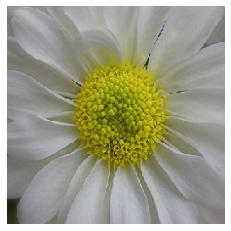

In [9]:
x, y = next(valid_generator)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

In [10]:
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

True label: daisy
Predicted label: daisy
